# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']# YOUR CODE HERE
        city_lng = city_weather['coord']['lon']# YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity'] # YOUR CODE HERE
        city_clouds = city_weather['clouds']['all'] # YOUR CODE HERE
        city_wind = city_weather['wind']['speed'] # YOUR CODE HERE
        city_country = city_weather['sys']['country'] # YOUR CODE HERE
        city_date = city_weather['dt'] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mitu
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | irymple
Processing Record 4 of Set 1 | kone
Processing Record 5 of Set 1 | majuro
Processing Record 6 of Set 1 | coquimbo
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | nova xavantina
Processing Record 10 of Set 1 | pauini
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | margate
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | vadso
Processing Record 15 of Set 1 | aldinga beach
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | buka
Processing Record 22 of Set 1 | bubaque
Processing Rec

In [18]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mitu,1.1983,-70.1733,22.42,99,100,0.85,CO,1685234434
1,longyearbyen,78.2186,15.6401,-2.09,54,0,3.09,SJ,1685234435
2,irymple,-34.2500,142.1667,12.83,88,94,3.58,AU,1685234435
3,kone,-21.0595,164.8658,25.85,51,10,3.12,NC,1685234436
4,majuro,7.0897,171.3803,30.98,74,75,2.06,MH,1685234437


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mitu,1.1983,-70.1733,22.42,99,100,0.85,CO,1685234434
1,longyearbyen,78.2186,15.6401,-2.09,54,0,3.09,SJ,1685234435
2,irymple,-34.2500,142.1667,12.83,88,94,3.58,AU,1685234435
3,kone,-21.0595,164.8658,25.85,51,10,3.12,NC,1685234436
4,majuro,7.0897,171.3803,30.98,74,75,2.06,MH,1685234437


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

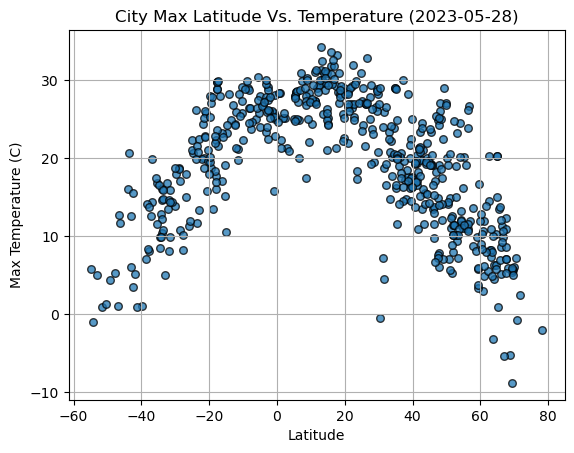

In [46]:
# Build scatter plot for latitude vs. temperature
from datetime import datetime

approx_date = datetime.utcfromtimestamp(city_data_df['Date'][0]).strftime('%Y-%m-%d')
city_data_df.plot('Lat', 'Max Temp', kind='scatter', grid=True, xlabel='Latitude', ylabel='Max Temperature (C)', title=f'City Max Latitude Vs. Temperature ({approx_date})', edgecolors='black', alpha=0.75, s=30)

# Incorporate the other graph properties

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

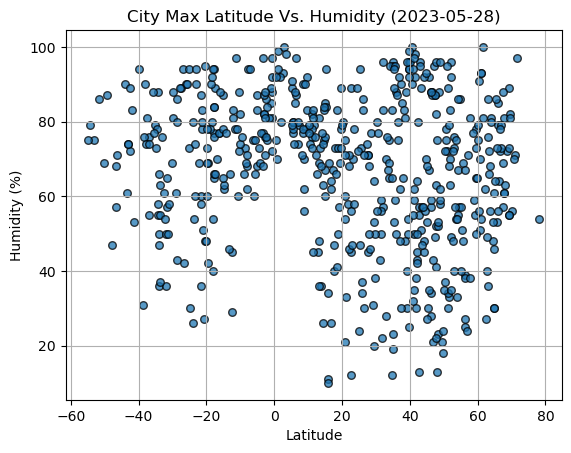

In [47]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot('Lat', 'Humidity', kind='scatter', grid=True, xlabel='Latitude', ylabel='Humidity (%)', title=f'City Max Latitude Vs. Humidity ({approx_date})', edgecolors='black', alpha=0.75, s=30)


# Incorporate the other graph properties

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

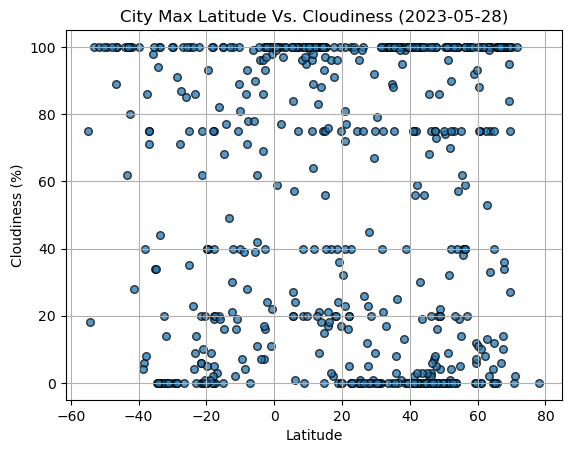

In [49]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot('Lat', 'Cloudiness', kind='scatter', grid=True, xlabel='Latitude', ylabel='Cloudiness (%)', title=f'City Max Latitude Vs. Cloudiness ({approx_date})', edgecolors='black', alpha=0.75, s=30)

# Incorporate the other graph properties

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

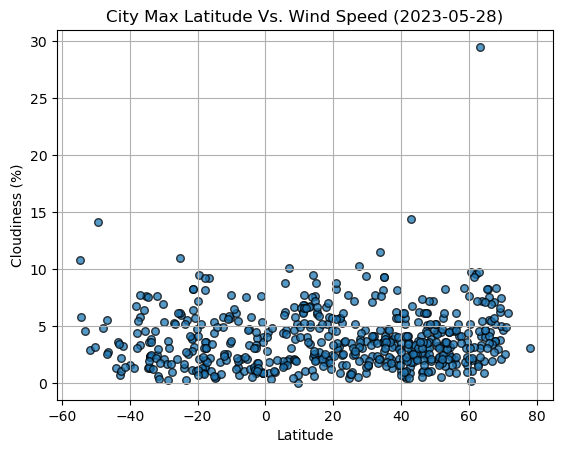

In [51]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot('Lat', 'Wind Speed', kind='scatter', grid=True, xlabel='Latitude', ylabel='Cloudiness (%)', title=f'City Max Latitude Vs. Wind Speed ({approx_date})', edgecolors='black', alpha=0.75, s=30)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [382]:
# Define a function to create Linear Regression plots
def plotLinearRegression(df, x, y, str1, str2):
    df.plot(x, y, kind='scatter', grid=True, xlabel=str1, ylabel=str2, title=f'City Max Latitude Vs. {str2} ({approx_date})', edgecolors='black', alpha=0.75, s=30)
    #y=mx+b
    slope, intercept, r, p, se = linregress(df[x], df[y])
    line = slope * df[x] + intercept
    plt.plot(df[x], line,'r', linewidth=2)
    
    # # Save the figure
    # plt.savefig("../output_data/Fig4.png")
    print(f"The r-value is: {r}")
    plt.annotate(f'y = {slope:.02f}x + {intercept:.02f}', xy=(5,85), xycoords='axes points', color='black', size=16, ha='left')
    # Show plot
    plt.show()

In [383]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mitu,1.1983,-70.1733,22.42,99,100,0.85,CO,1685234434
1,longyearbyen,78.2186,15.6401,-2.09,54,0,3.09,SJ,1685234435
4,majuro,7.0897,171.3803,30.98,74,75,2.06,MH,1685234437
10,bethel,41.3712,-73.4140,19.46,50,2,0.45,US,1685234159
11,margate,51.3813,1.3862,11.06,89,9,1.79,GB,1685234440


In [384]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,irymple,-34.2500,142.1667,12.83,88,94,3.58,AU,1685234435
3,kone,-21.0595,164.8658,25.85,51,10,3.12,NC,1685234436
5,coquimbo,-29.9533,-71.3436,13.85,88,0,2.06,CL,1685234183
6,adamstown,-25.0660,-130.1015,22.30,73,35,10.99,PN,1685234437
7,edinburgh of the seven seas,-37.0676,-12.3116,12.61,55,75,3.35,SH,1685234438


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7922050078439777


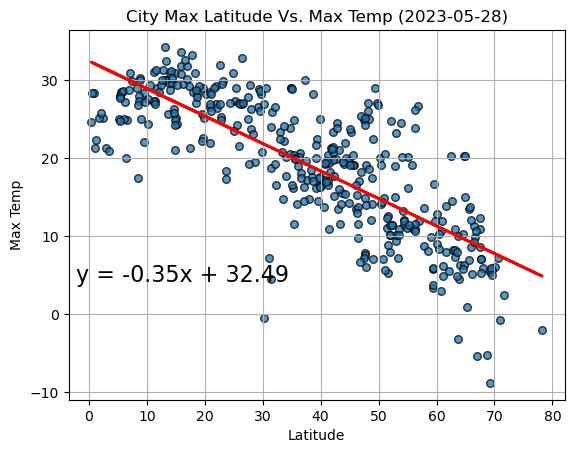

In [385]:
# Linear regression on Northern Hemisphere
plotLinearRegression(northern_hemi_df, 'Lat', 'Max Temp', 'Latitude', 'Max Temp')

The r-value is: 0.8280280874232381


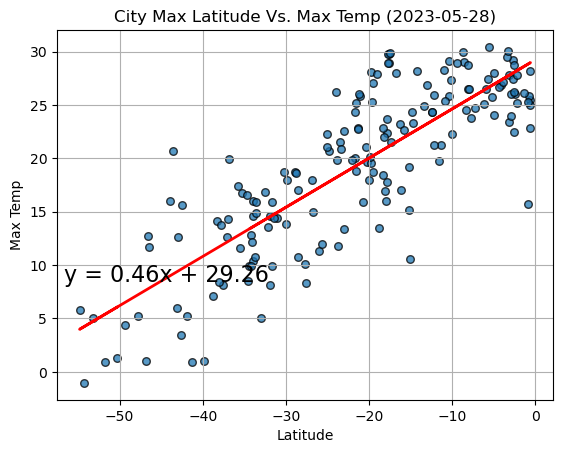

In [386]:
# Linear regression on Southern Hemisphere
plotLinearRegression(southern_hemi_df, 'Lat', 'Max Temp', 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** The Linear Relationship between the two hemispheres is that the farther you go from the origin of latitude 0, max temperature decreases. And the two meet at its max temp peak at latitude 0 where the slope/vertex is 0. The r-value in the two hemispheres, confirms there is a significant correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.1331123460706087


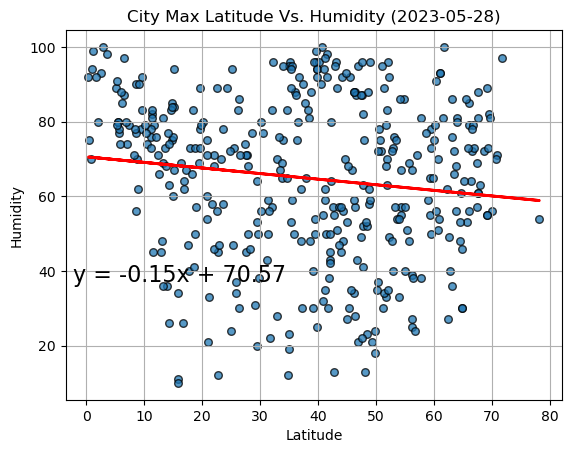

In [387]:
# Northern Hemisphere
plotLinearRegression(northern_hemi_df, 'Lat', 'Humidity', 'Latitude', 'Humidity')

The r-value is: 0.1910251767974326


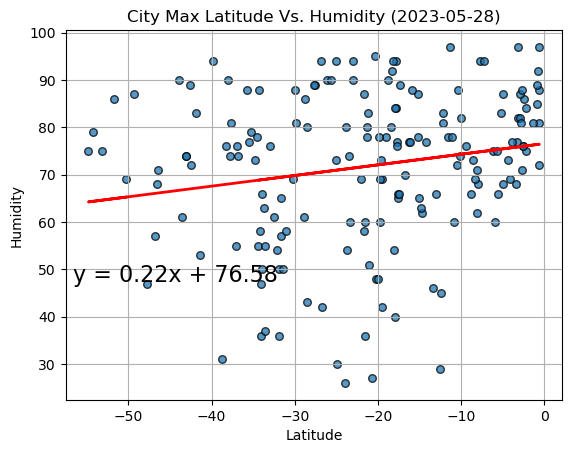

In [388]:
# Southern Hemisphere
plotLinearRegression(southern_hemi_df, 'Lat', 'Humidity', 'Latitude', 'Humidity')

**Discussion about the linear relationship:** The Linear Relationship between the two hemispheres is that the farther you go from the origin of latitude 0, humidity MAY decrease slightly. The difference isnt as big as temperature drop as we've seen before but it does decrease from the point of origin a bit. R-Value is very minimal with some correlation

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.09562803675571852


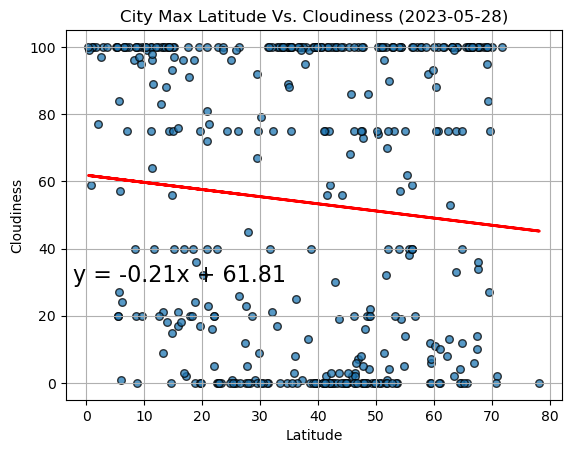

In [396]:
# Northern Hemisphere
plotLinearRegression(northern_hemi_df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness')

The r-value is: -0.009239404070361789


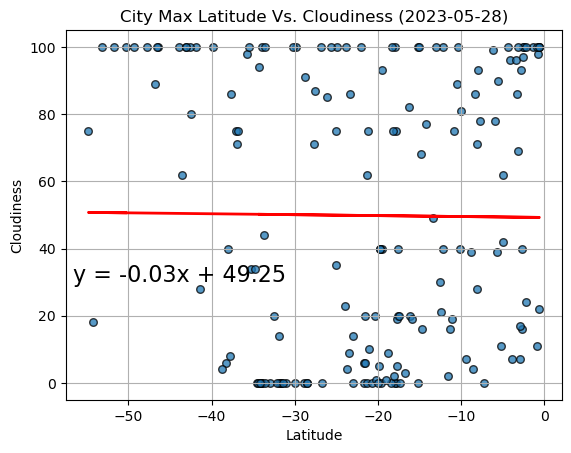

In [397]:
# Southern Hemisphere
plotLinearRegression(southern_hemi_df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** There is no linear relationship between Latitude and cloudiness. Each position seems to be volatile and not consistent enough to make a determination. R-value is also closer to zero confirm there is no certain correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05450844837195043


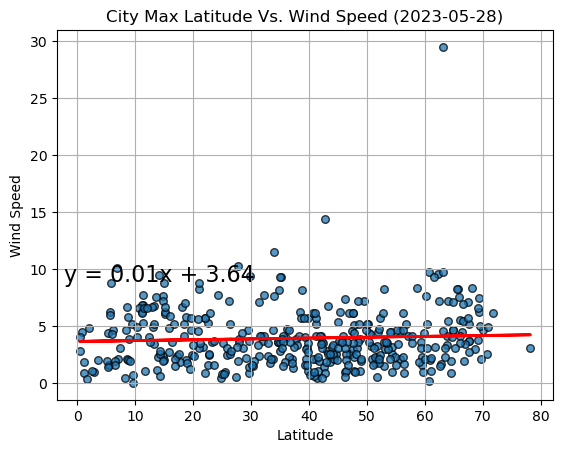

In [398]:
# Northern Hemisphere
plotLinearRegression(northern_hemi_df, 'Lat', 'Wind Speed', 'Latitude', 'Wind Speed')

The r-value is: -0.16920771828971828


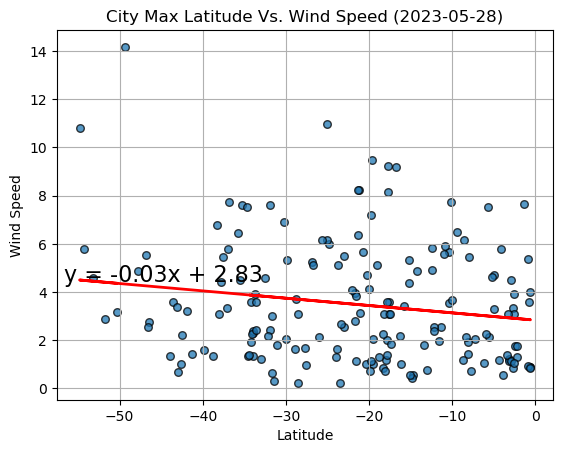

In [399]:
# Southern Hemisphere
plotLinearRegression(southern_hemi_df, 'Lat', 'Wind Speed', 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** The is no correlation between latitude and windspeed. The R-Value in the northern hemisphere is closer to 0 which demonstrates no correlation between the two factors and in the souther hemisphere it becomes slightly more correlated but not enough to say it is significant.